# Install Module

In [ ]:
!pip install tensorflow Keras numpy pandas imutils scikit-learn matplotlib seaborn flask flask-cors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Modelling

## Import Package & Module

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report

## Buka Folder

In [2]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Checking Folder

!ls "drive/My Drive/dataset"

dataset_daun   dataset_pohon	 model.h5
dataset_plant  dataset_tumbuhan  model_v2.h5


In [4]:
from PIL import Image

sdir = '/content/drive/My Drive/dataset/dataset_plant'

pathfile=[]
labels=[]
allowed_extensions = ['.jpg', '.jpeg', '.png']

list_class=os.listdir(sdir)
for classes in list_class:
    classpath=os.path.join(sdir,classes)
    if os.path.isdir(classpath):
        file_list=os.listdir(classpath)
        for file in file_list:
            file_path=os.path.join(classpath,file)
            extension = os.path.splitext(file)[1].lower()
            if extension in allowed_extensions:
              try:
                    img = Image.open(file_path)
                    # img = img.resize((224, 224))  # Resize the image to desired size
                    pathfile.append(file_path)
                    labels.append(classes)
              except (OSError, IOError):
                    print("Error opening image:", file_path)
            else:
                print("Unsupported file format:", file_path)

Fseries= pd.Series(pathfile, name='pathfile')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print (df['labels'].value_counts())

                                            pathfile         labels
0  /content/drive/My Drive/dataset/dataset_plant/...  Pohon Kenanga
1  /content/drive/My Drive/dataset/dataset_plant/...  Pohon Kenanga
2  /content/drive/My Drive/dataset/dataset_plant/...  Pohon Kenanga
3  /content/drive/My Drive/dataset/dataset_plant/...  Pohon Kenanga
4  /content/drive/My Drive/dataset/dataset_plant/...  Pohon Kenanga
Pohon Trembesi        345
Pohon Kerai Payung    322
pohon Matoa           318
Pohon Bungur          318
Pohon Cassia          316
Pohon Beringin        298
Pohon Kenanga         286
Pohon Saga            249
Pohon Jati            236
pohon Mahoni          234
Name: labels, dtype: int64


## Split Dataset

In [5]:
from sklearn.model_selection import train_test_split

train_split = .8
valid_split = .1
dummy_split = valid_split/(1-train_split)

train_dataset_path, dummy_dataset_path= train_test_split(df, test_size=valid_split, stratify=df['labels'], shuffle=True, random_state=123)
test_dataset_path, valid_dataset_path= train_test_split(dummy_dataset_path, test_size=dummy_split, shuffle=True, random_state=123)

print ('train_df length: ', len(train_dataset_path), '  valid_df length: ', len(valid_dataset_path), '  test_df length: ', len(test_dataset_path))


train_df length:  2629   valid_df length:  147   test_df length:  146


In [6]:
train_dataset_path

pathfile              labels
794   /content/drive/My Drive/dataset/dataset_plant/...         pohon Matoa
2120  /content/drive/My Drive/dataset/dataset_plant/...          Pohon Saga
125   /content/drive/My Drive/dataset/dataset_plant/...       Pohon Kenanga
1574  /content/drive/My Drive/dataset/dataset_plant/...        Pohon Cassia
1238  /content/drive/My Drive/dataset/dataset_plant/...      Pohon Trembesi
...                                                 ...                 ...
415   /content/drive/My Drive/dataset/dataset_plant/...  Pohon Kerai Payung
2050  /content/drive/My Drive/dataset/dataset_plant/...          Pohon Saga
2236  /content/drive/My Drive/dataset/dataset_plant/...        pohon Mahoni
2580  /content/drive/My Drive/dataset/dataset_plant/...          Pohon Jati
1089  /content/drive/My Drive/dataset/dataset_plant/...      Pohon Trembesi

[2629 rows x 2 columns]

In [9]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(#rotation_range=20,
                                  #  horizontal_flip=True,
                                  #  vertical_flip=True,
                                    rescale=1.0/255,
                                  #zoom_range=0.2,
                                  #width_shift_range=0.2,
                                  #height_shift_range=0.2,
                                  # fill_mode='nearest'
                                   )
train_generator = train_datagen.flow_from_dataframe(train_dataset_path,
                                                    x_col='pathfile',
                                                    y_col='labels',
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color='rgb',
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(#rotation_range=20,
                                        # horizontal_flip=True,
                                        # vertical_flip=True,
                                        rescale=1.0/255,
                                        #zoom_range=0.2,
                                        #width_shift_range=0.2,
                                        #height_shift_range=0.2,
                                        # fill_mode='nearest'
                                        )
validation_generator = validation_datagen.flow_from_dataframe(valid_dataset_path,
                                                              x_col='pathfile',
                                                              y_col='labels',
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                              color='rgb',
                                                             shuffle=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_dataframe(test_dataset_path,
                                                  x_col='pathfile',
                                                  y_col='labels',
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 2629 validated image filenames belonging to 10 classes.
Found 147 validated image filenames belonging to 10 classes.
Found 146 validated image filenames belonging to 10 classes.


In [12]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Pohon Beringin
1 : Pohon Bungur
2 : Pohon Cassia
3 : Pohon Jati
4 : Pohon Kenanga
5 : Pohon Kerai Payung
6 : Pohon Saga
7 : Pohon Trembesi
8 : pohon Mahoni
9 : pohon Matoa


## Cek Image Dataset

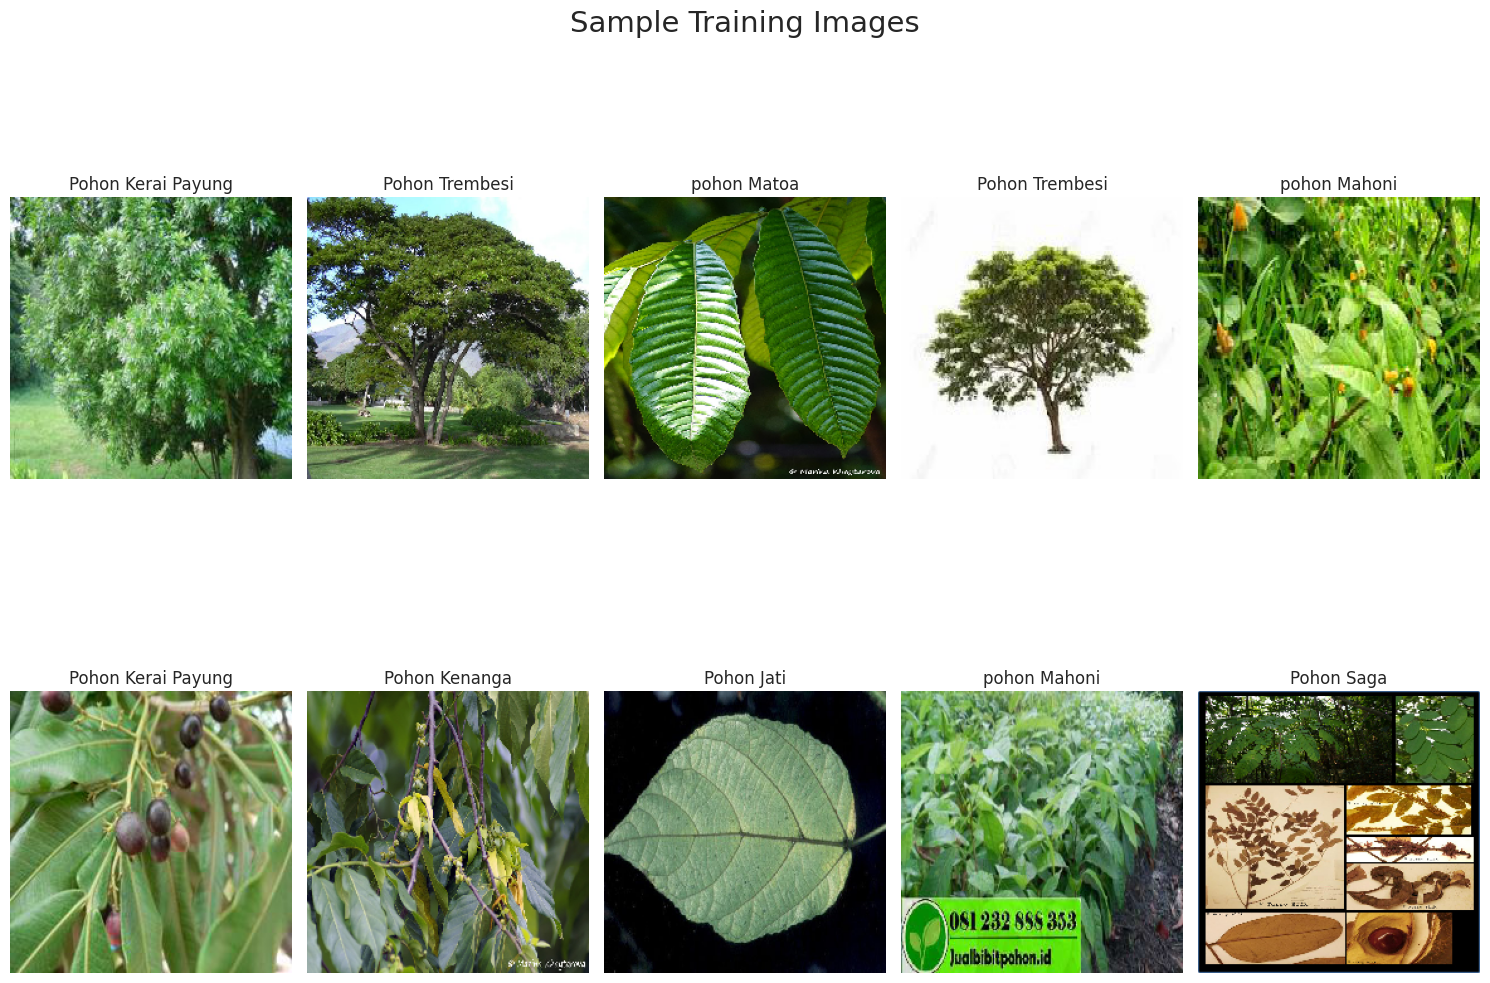

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

## Create Model

In [14]:
# from tf.keras.applications.vgg16 import VGG16
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model=tf.keras.applications.Xception(include_top=False, weights="imagenet",input_tensor=Input(shape=(224,224,3)))

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
base_model.trainable = False

In [17]:
model = tf.keras.Sequential([
            base_model,

            tf.keras.layers.Conv2D(filters=1024, kernel_size=3, padding='same',  activation='relu', strides=1),
            tf.keras.layers.MaxPool2D(pool_size=2),
            tf.keras.layers.Dropout(rate=0.5),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics='accuracy')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 1024)        4719616   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                        

In [21]:
epochs =25

history=model.fit(x=train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/25
42/42 [==============================] - 76s 1s/step - loss: 2.6178 - accuracy: 0.2214 - val_loss: 2.0054 - val_accuracy: 0.3061
Epoch 2/25
42/42 [==============================] - 52s 1s/step - loss: 1.7737 - accuracy: 0.4104 - val_loss: 1.6507 - val_accuracy: 0.5170
Epoch 3/25
42/42 [==============================] - 51s 1s/step - loss: 1.5175 - accuracy: 0.5032 - val_loss: 1.5589 - val_accuracy: 0.4966
Epoch 4/25
42/42 [==============================] - 50s 1s/step - loss: 1.2514 - accuracy: 0.5972 - val_loss: 1.3775 - val_accuracy: 0.5782
Epoch 5/25
42/42 [==============================] - 50s 1s/step - loss: 0.9951 - accuracy: 0.6938 - val_loss: 1.3042 - val_accuracy: 0.5782
Epoch 6/25
42/42 [==============================] - 52s 1s/step - loss: 0.8380 - accuracy: 0.7490 - val_loss: 1.2420 - val_accuracy: 0.6190
Epoch 7/25
42/42 [==============================] - 49s 1s/step - loss: 0.7155 - accuracy: 0.7916 - val_loss: 1.2861 - val_accuracy: 0.6327
Epoch 8/25
42/42 [==

## Buat Grafik Training Data

In [22]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

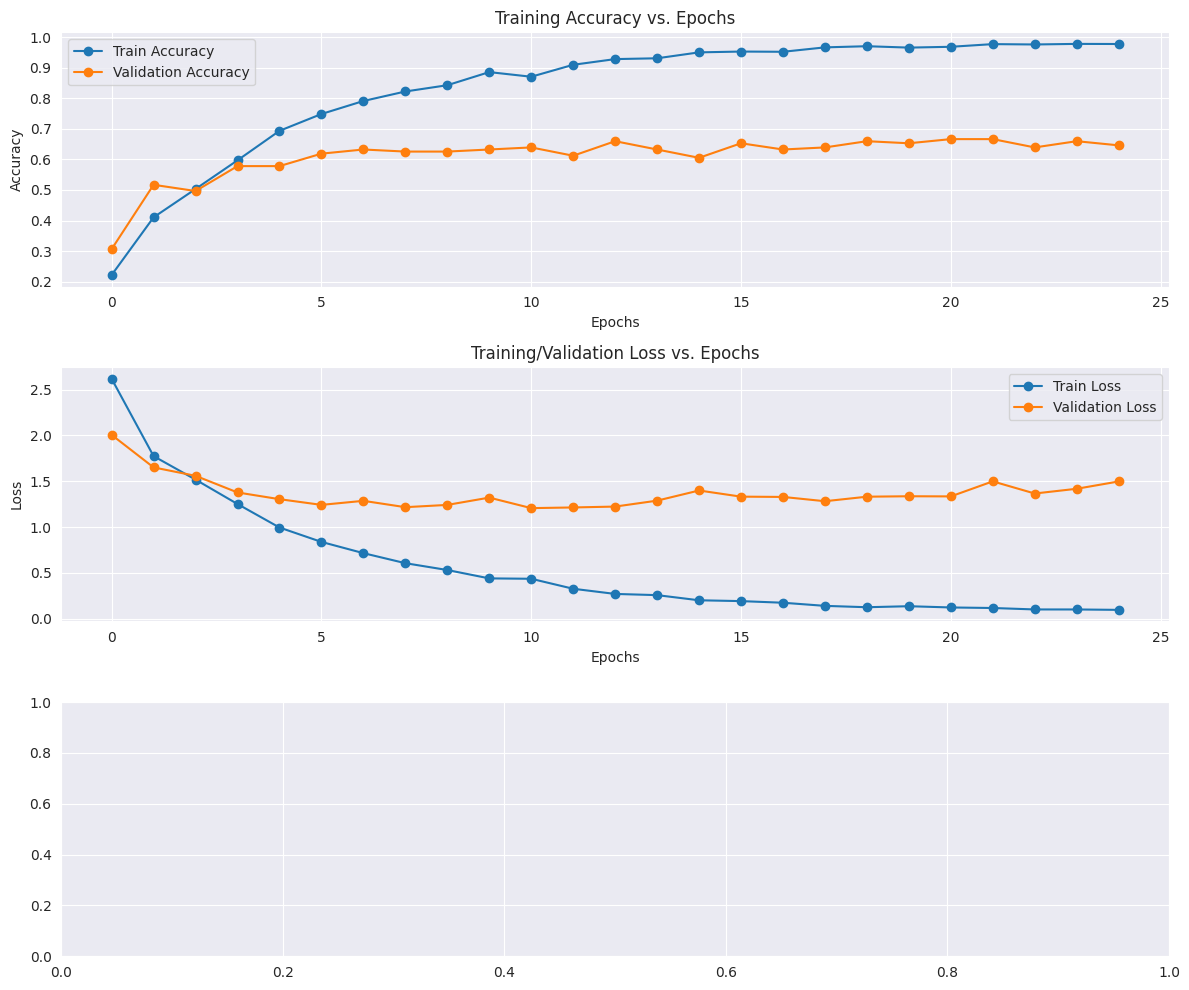

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

## modelling prediction buat test set

In [24]:
predictions = model.predict(test_generator)

3/3 [==============================] - 6s 2s/step


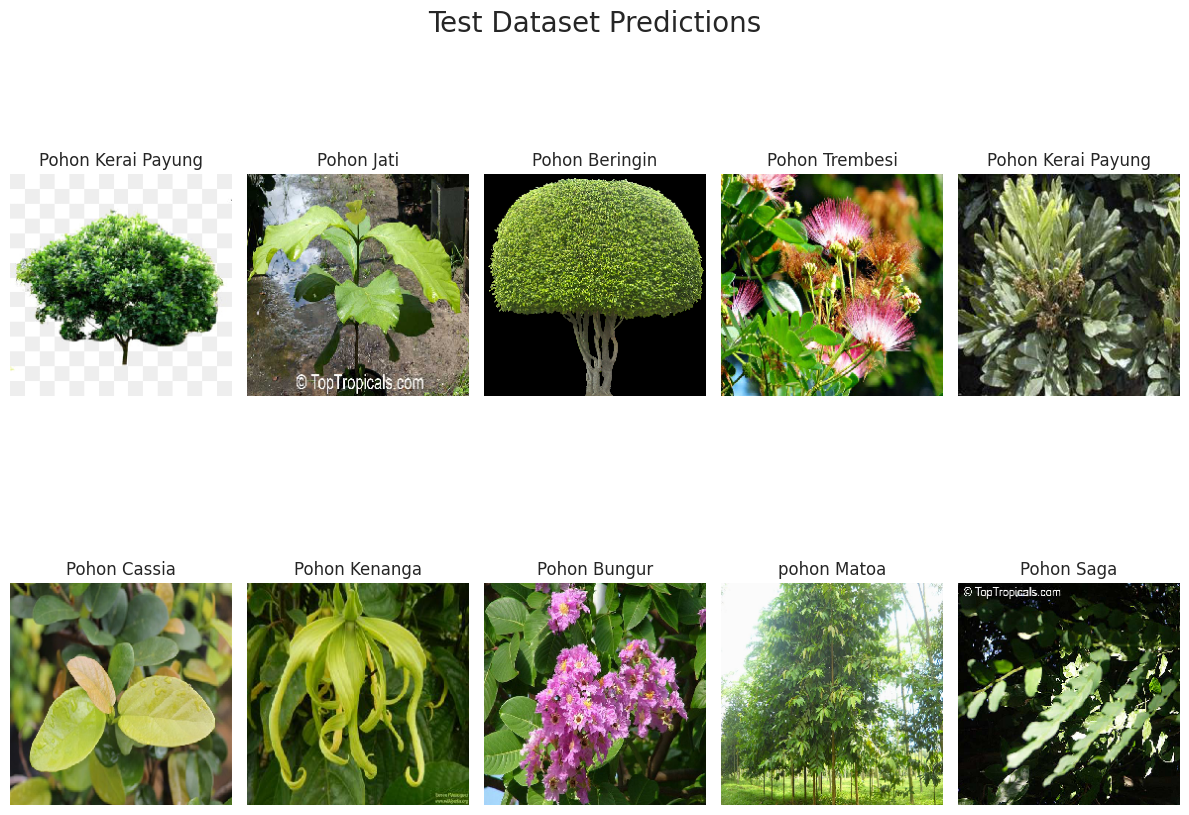

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [27]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

3/3 [==============================] - 3s 651ms/step - loss: 1.0658 - accuracy: 0.7671


In [28]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     1.0657538175582886
Test Accuracy: 0.767123281955719


## Buat Grafik metrik klasifikasinya

In [29]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

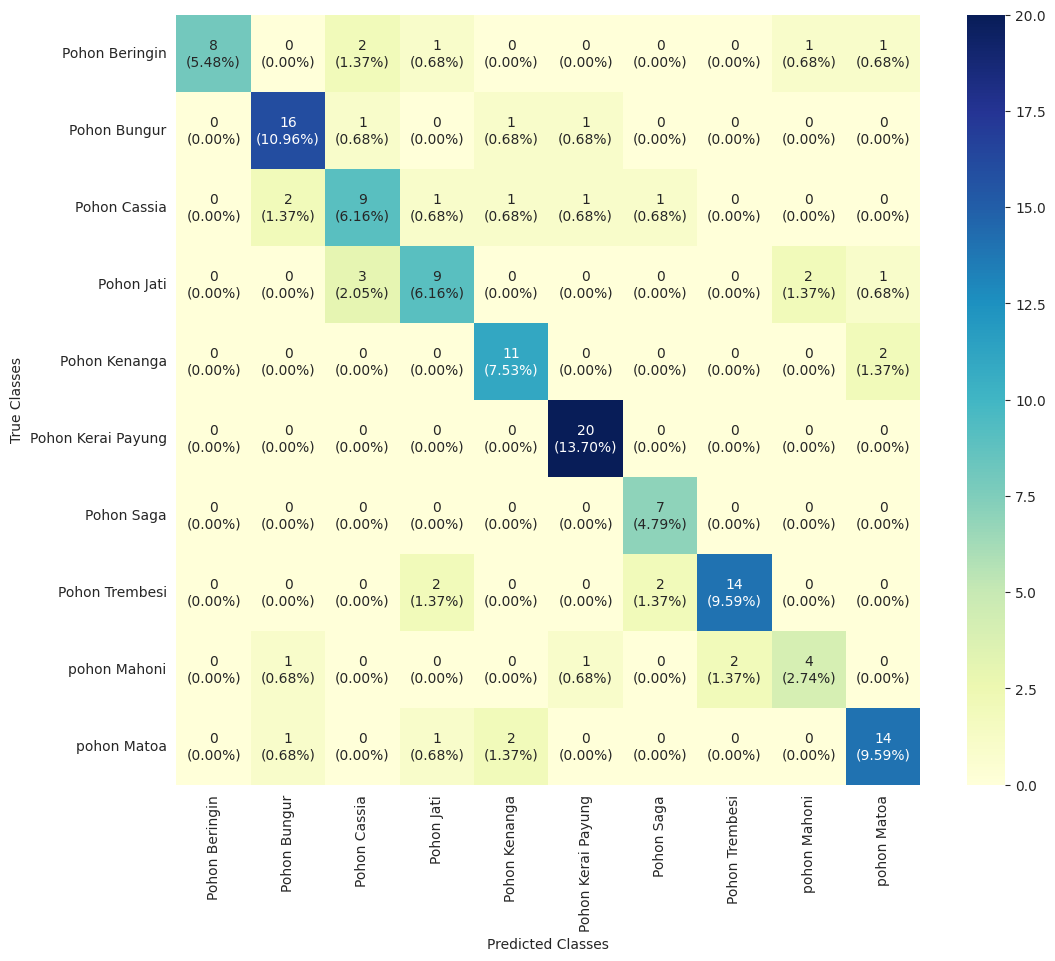

In [30]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(10, 10)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [31]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                    precision    recall  f1-score   support

    Pohon Beringin       1.00      0.62      0.76        13
      Pohon Bungur       0.80      0.84      0.82        19
      Pohon Cassia       0.60      0.60      0.60        15
        Pohon Jati       0.64      0.60      0.62        15
     Pohon Kenanga       0.73      0.85      0.79        13
Pohon Kerai Payung       0.87      1.00      0.93        20
        Pohon Saga       0.70      1.00      0.82         7
    Pohon Trembesi       0.88      0.78      0.82        18
      pohon Mahoni       0.57      0.50      0.53         8
       pohon Matoa       0.78      0.78      0.78        18

          accuracy                           0.77       146
         macro avg       0.76      0.76      0.75       146
      weighted avg       0.77      0.77      0.76       146



## prediksi yang salah

In [32]:
import numpy as np

y_true = np.array(y_true)
y_pred = np.array(y_pred)

errors = np.where(y_true != y_pred)[0]
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]


In [33]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

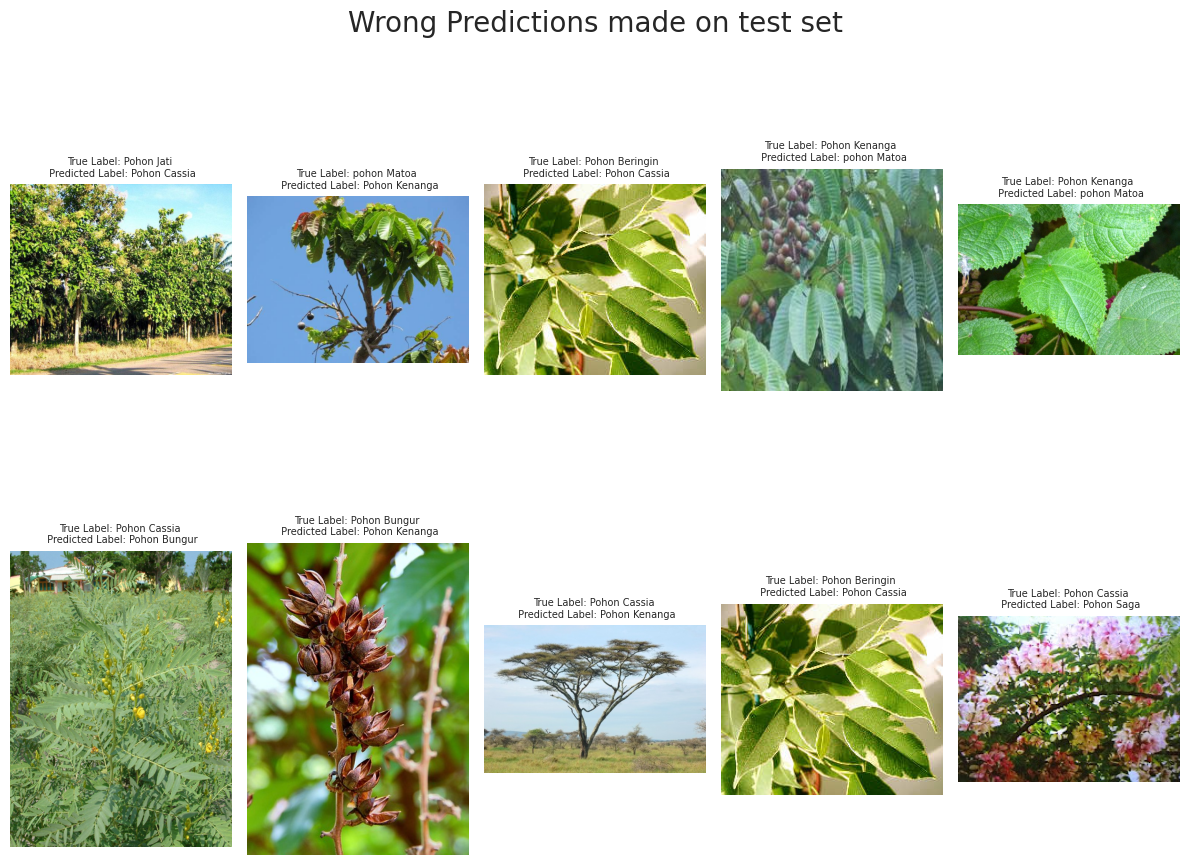

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}", fontsize = 7)
        img_path = os.path.join(test_dataset_path.iloc[idx]['pathfile'], test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

# Save Model

In [37]:
# Masuk ke direktori yang diinginkan
os.chdir('/content')

# Simpan model ke file .h5
model.save('model_v2.h5')

# Mengunduh model
from google.colab import files
files.download('model_v2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>